# 1.Loading the data

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm


from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.cluster import AgglomerativeClustering
from wordcloud import WordCloud, STOPWORDS 

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
download = drive.CreateFile({'id': '1K1rpp1cP61oOjKc9CIx-0v4z2SdyOpyi'})
download.GetContentFile('final.sqlite')

In [0]:
con = sqlite3.connect('final.sqlite')
final = pd.read_sql_query(""" SELECT * FROM Reviews""", con) 

## 3.1 Spliting CleanedText

In [0]:
final=final.sort_values(by=['Time'],ascending=False)
finalDataPoints=final.head(20000)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

x=finalDataPoints['CleanedText']













# 4.Bag of Words (BoW)

## 4.1 Unigram

In [0]:
#BOW for unigram
bow = CountVectorizer()
x_uni = bow.fit_transform(x)
x_uni=x_uni.todense()

## 4.1.1 AgglomerativeClustering with n_clusters=2

In [0]:
AC = AgglomerativeClustering(n_clusters=2)
AC.fit(x_uni)
labels = AC.labels_
#finding the feature name
feature_names=bow.get_feature_names()

## WordCloud

In [0]:
#index of each x_uni clusters_data with there respective Labels
clusters_data = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data:
    clusters_data[label] = []
  clusters_data[label].append(document_id)


 Cluster 0:


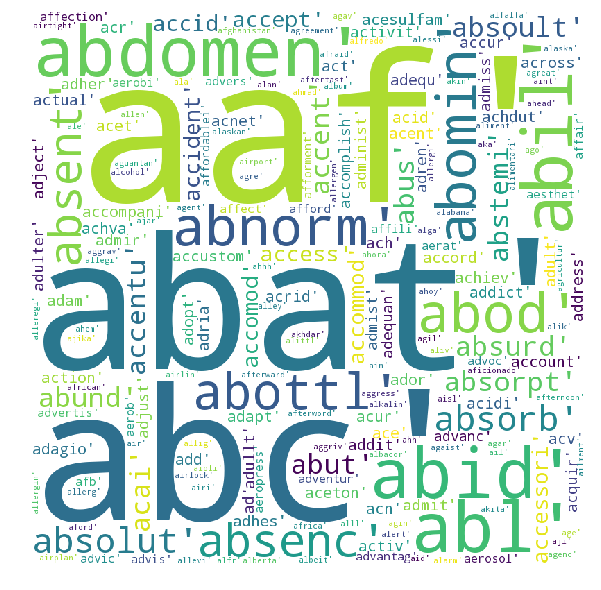


 Cluster 1:


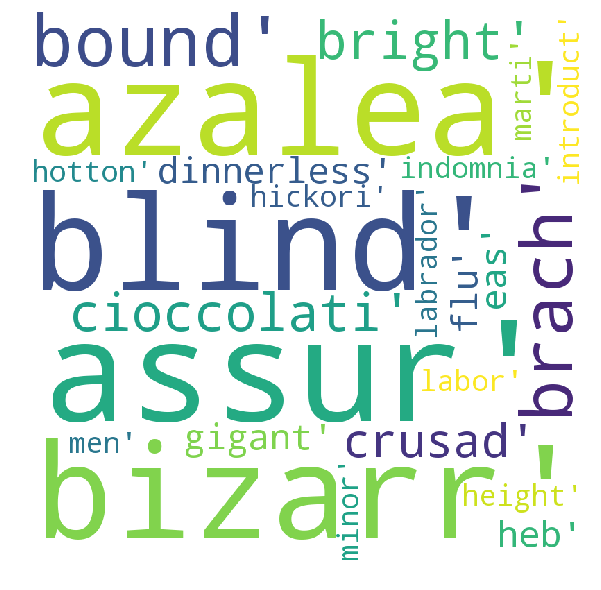

In [0]:
#wordCloud
for i in clusters_data:
  print("\n Cluster %d:" % i)
  clusterList=[]
  words = clusters_data.get(i)
  #putting the word into there respective cluster
  for index in words:
    clusterList.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

## 4.1.2 AgglomerativeClustering with n_clusters=5

In [0]:
AC = AgglomerativeClustering(n_clusters=5)
AC.fit(x_uni)
labels = AC.labels_
#finding the feature name
feature_names=bow.get_feature_names()

## wordCloud

In [0]:
#index of each x_uni clusters_data with there respective Labels
clusters_data = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data:
    clusters_data[label] = []
  clusters_data[label].append(document_id)


 Cluster 4:


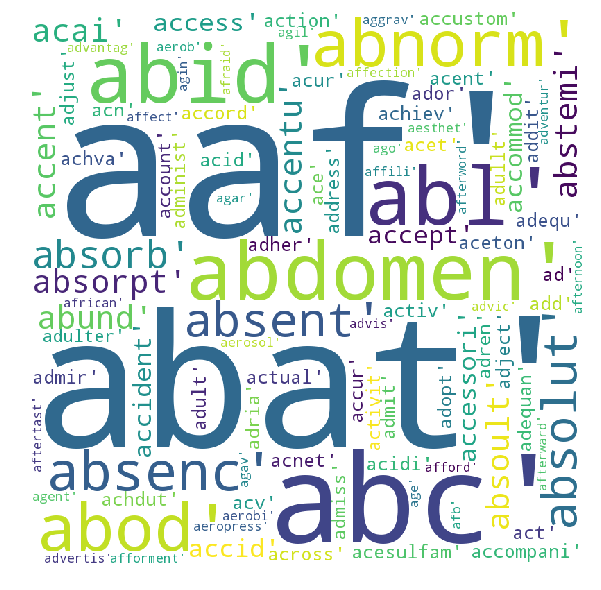


 Cluster 1:


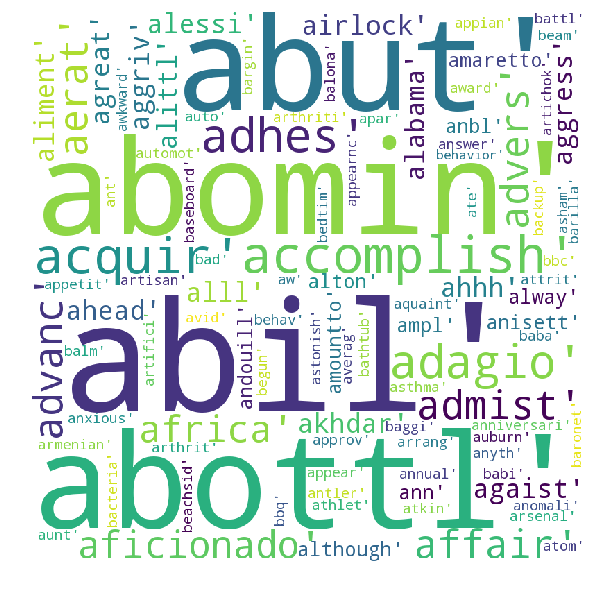


 Cluster 2:


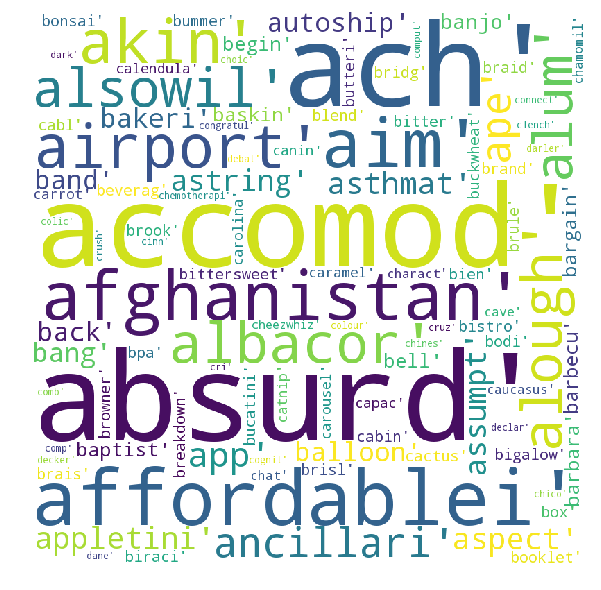


 Cluster 3:


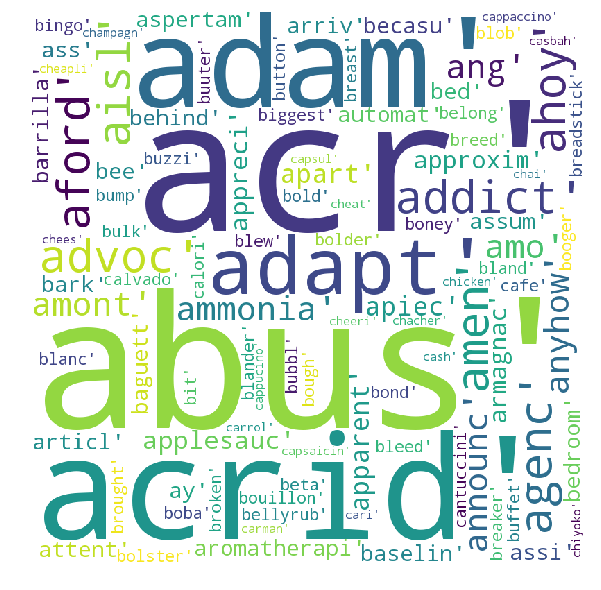


 Cluster 0:


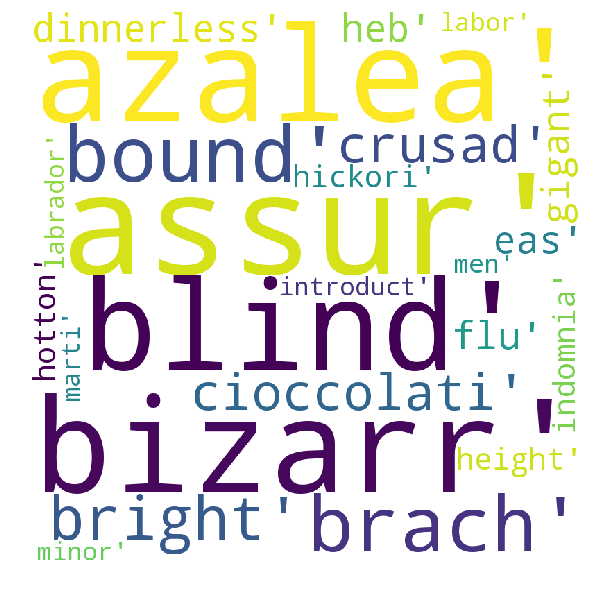

In [0]:
for i in clusters_data:
  print("\n Cluster %d:" % i)
  clusterList=[]
  words = clusters_data.get(i)
  #putting the word into there respective cluster
  for index in words:
    clusterList.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

## 4.2 Bi-gram

In [0]:
bi_gram = CountVectorizer(ngram_range=(1,2))
x_bi = bi_gram.fit_transform(x)
x_bi=x_bi.todense()

## 4.2.1 AgglomerativeClustering with n_clusters=2

In [0]:
AC = AgglomerativeClustering(n_clusters=2)
AC.fit(x_bi)
labels = AC.labels_
#finding the feature name
feature_names=bi_gram.get_feature_names()

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_bi = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_bi:
    clusters_data_bi[label] = []
  clusters_data_bi[label].append(document_id)


 Cluster 0:


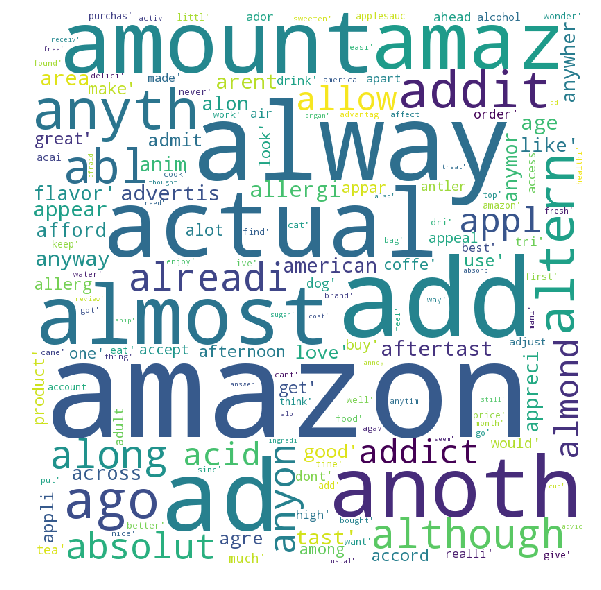


 Cluster 1:


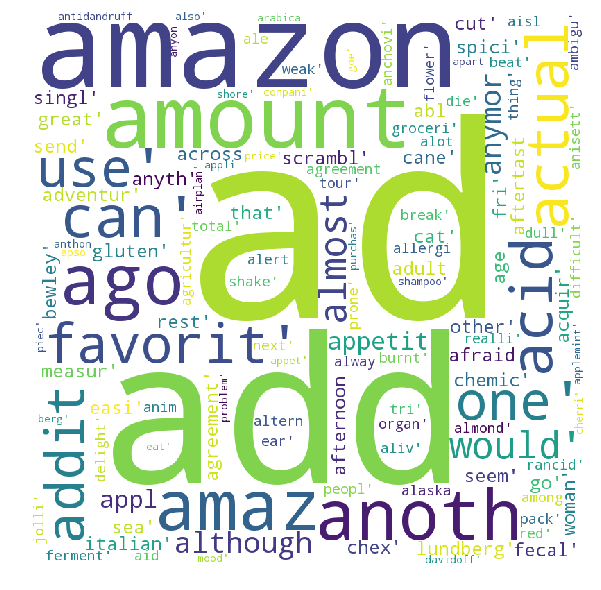

In [0]:
for i in clusters_data_bi:
  print("\n Cluster %d:" % i)
  clusterList_bi=[]
  words = clusters_data_bi.get(i)
  #putting the word into there respective cluster
  for index in words:
    clusterList_bi.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_bi))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

## 4.2.2 AgglomerativeClustering with n_clusters=5

In [0]:
AC = AgglomerativeClustering(n_clusters=5)
AC.fit(x_bi)
labels = AC.labels_
feature_names=bi_gram.get_feature_names()

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_bi = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_bi:
    clusters_data_bi[label] = []
  clusters_data_bi[label].append(document_id)


 Cluster 0:


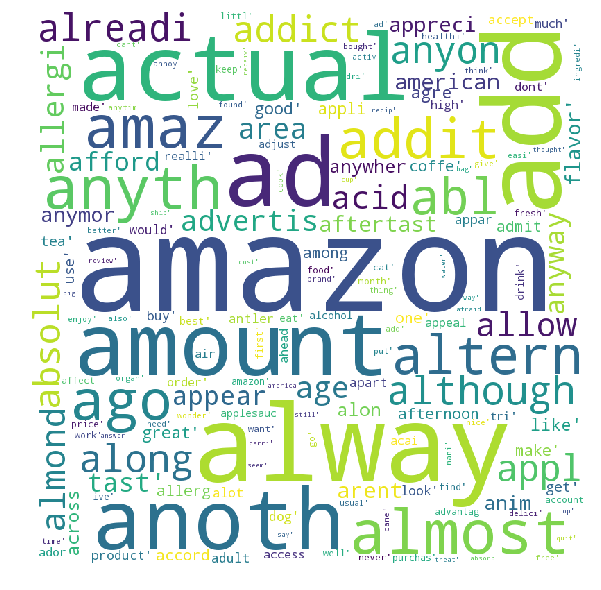


 Cluster 3:


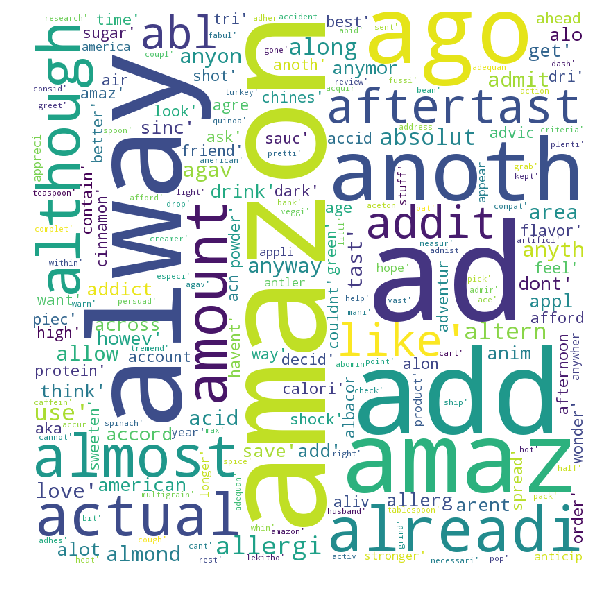


 Cluster 2:


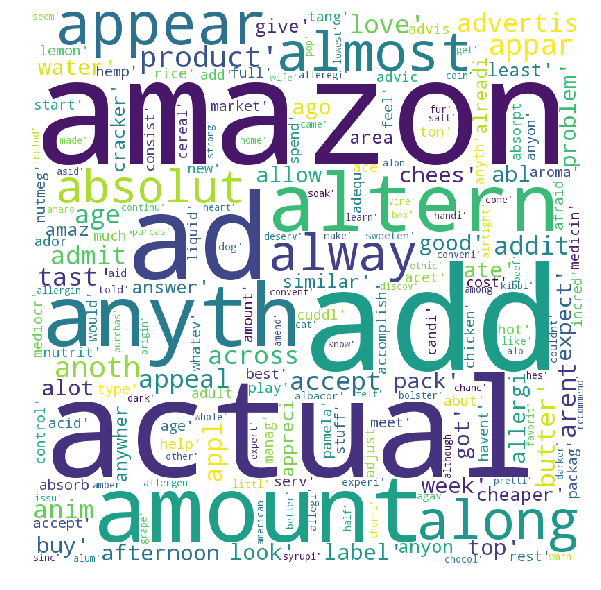


 Cluster 1:


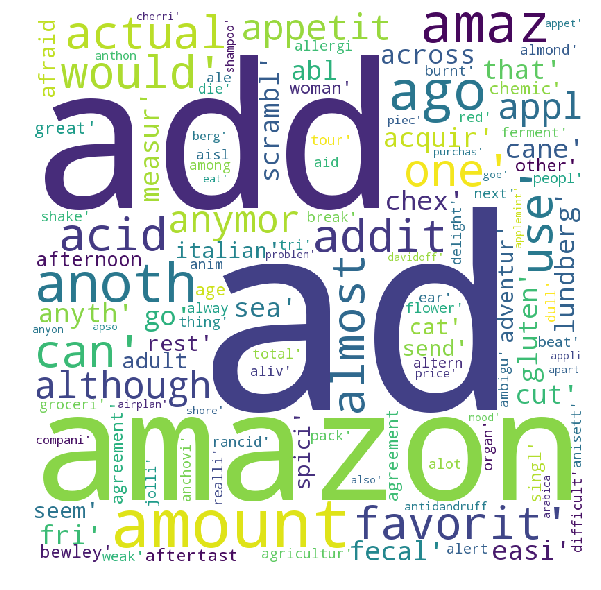


 Cluster 4:


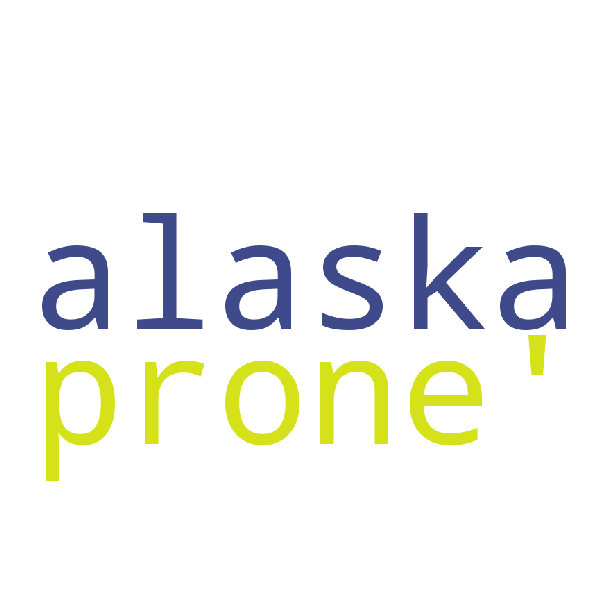

In [0]:
for i in clusters_data_bi:
  print("\n Cluster %d:" % i)
  clusterList_bi=[]
  words = clusters_data_bi.get(i)
  #putting the word into there respective cluster
  for index in words:
    clusterList_bi.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_bi))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

## 5 TF-IDF

In [0]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
x_tfidf = tf_idf_vect.fit_transform(x)
x_tfidf=x_tfidf.todense()

## 4.2.1 AgglomerativeClustering with n_clusters=2

In [0]:
AC = AgglomerativeClustering(n_clusters=2)
AC.fit(x_tfidf)
labels = AC.labels_
feature_names=tf_idf_vect.get_feature_names()

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_tfidf = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_tfidf:
    clusters_data_tfidf[label] = []
  clusters_data_tfidf[label].append(document_id)


 Cluster 0:


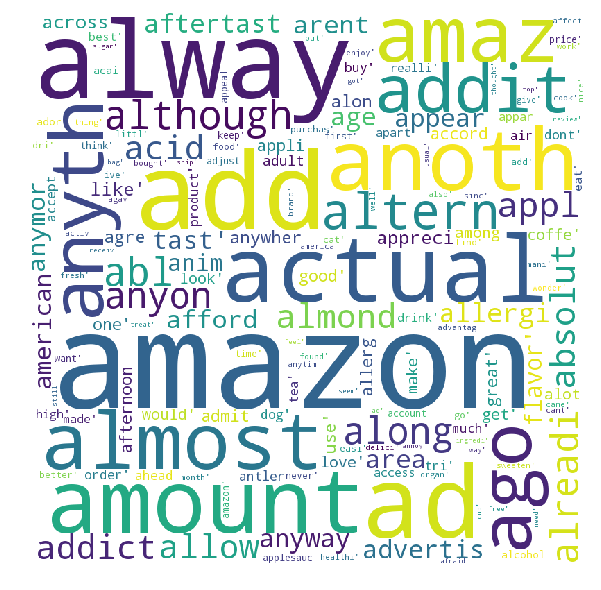


 Cluster 1:


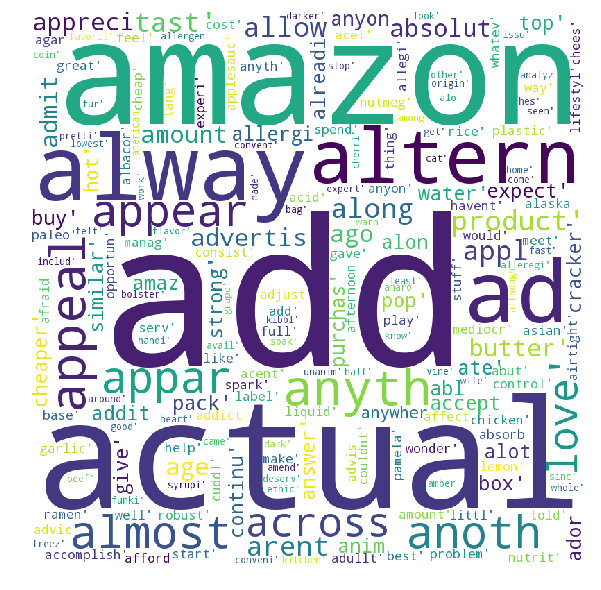

In [0]:
for i in clusters_data_tfidf:
  print("\n Cluster %d:" % i)
  clusterList_tfidf=[]
  #putting the word into there respective cluster
  words = clusters_data_tfidf.get(i)
  for index in words:
    clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

## 4.2.2 AgglomerativeClustering with n_clusters=5

In [0]:
AC = AgglomerativeClustering(n_clusters=5)
AC.fit(x_tfidf)
labels = AC.labels_
feature_names=tf_idf_vect.get_feature_names()

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_tfidf = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_tfidf:
    clusters_data_tfidf[label] = []
  clusters_data_tfidf[label].append(document_id)


 Cluster 0:


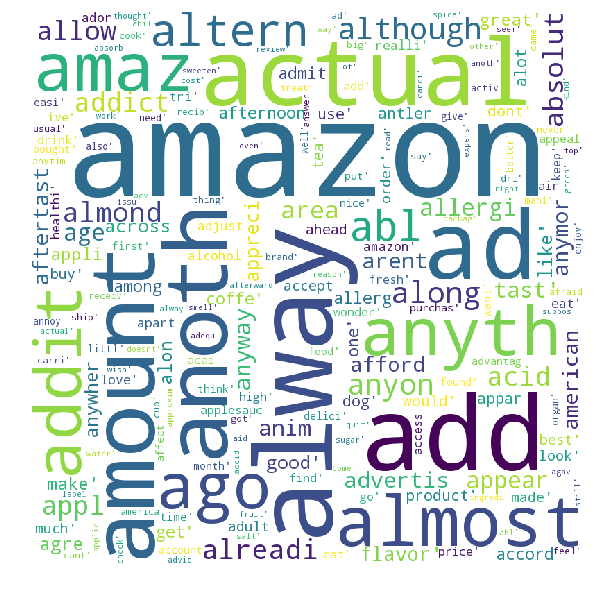


 Cluster 3:


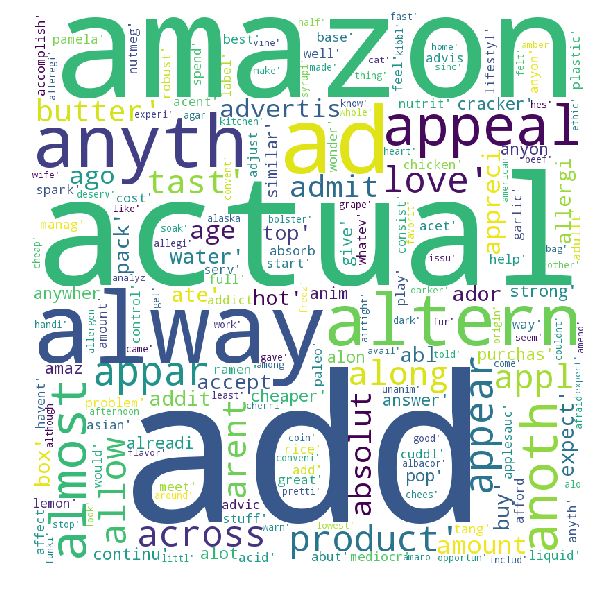


 Cluster 2:


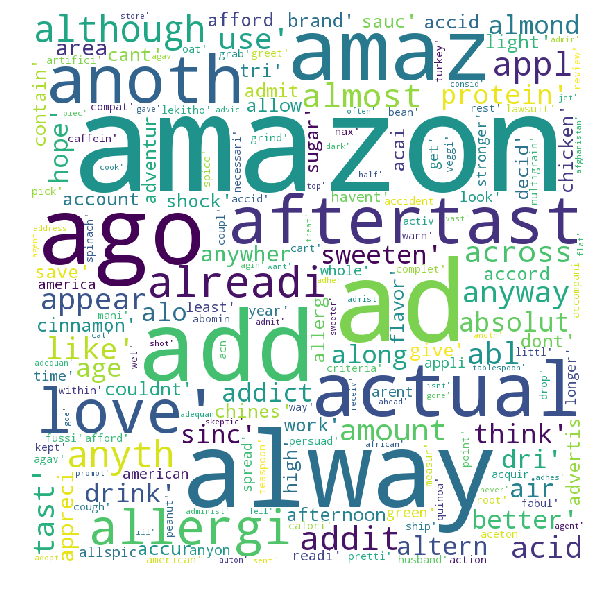


 Cluster 4:


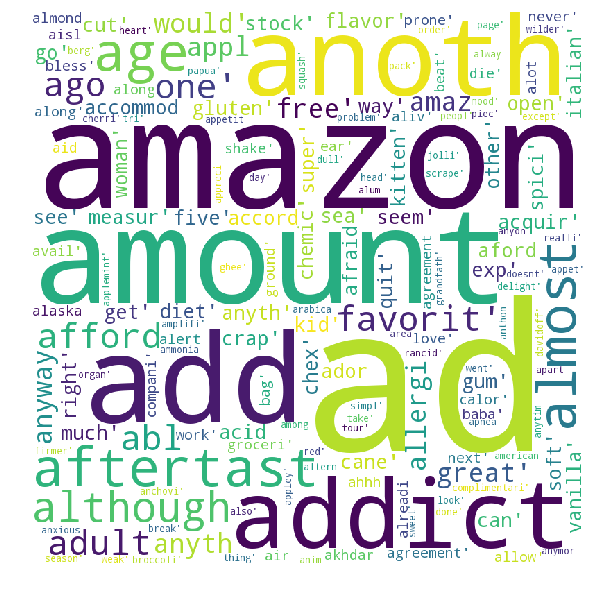


 Cluster 1:


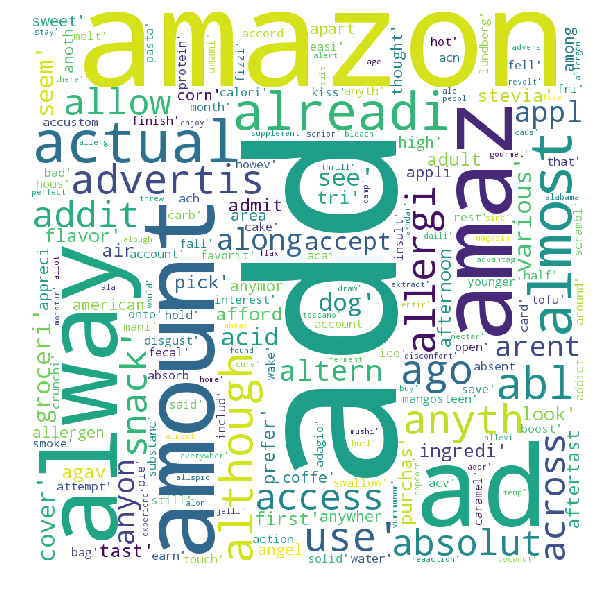

In [0]:
for i in clusters_data_tfidf:
  print("\n Cluster %d:" % i)
  clusterList_tfidf=[]
  #putting the word into there respective cluster
  words = clusters_data_tfidf.get(i)
  for index in words:
    clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

# 6 Word2Vec

In [0]:
i=0
list_of_sent=[]
for sent in x:
    list_of_sent.append(sent.split())

In [0]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [0]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  2999
sample words  ['big', 'lover', 'fig', 'jam', 'uniqu', 'flavor', 'kind', 'mix', 'light', 'dark', 'must', 'tri', 'great', 'product', 'good', 'price', 'definit', 'order', 'use', 'bottl', 'empti', 'expect', 'box', 'full', 'fortun', 'cooki', 'like', 'one', 'nonetheless', 'got', 'small', 'tast', 'weird', 'okay', 'best', 'ever', 'review', 'amazon', 'check', 'label', 'contain', 'sure', 'enough', 'top', 'ingredi', 'ive', 'done', 'research', 'also', 'found']


# 7.Avg W2V

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

5000
50


In [0]:
x_av1=sent_vectors

## 7.1 AgglomerativeClustering with n_clusters=2

In [0]:
AC = AgglomerativeClustering(n_clusters=2)
AC.fit(x_av1)
labels = AC.labels_
feature_names=w2v_model.wv.index2word

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_tfidf = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_tfidf:
    clusters_data_tfidf[label] = []
  clusters_data_tfidf[label].append(document_id)


 Cluster 0:


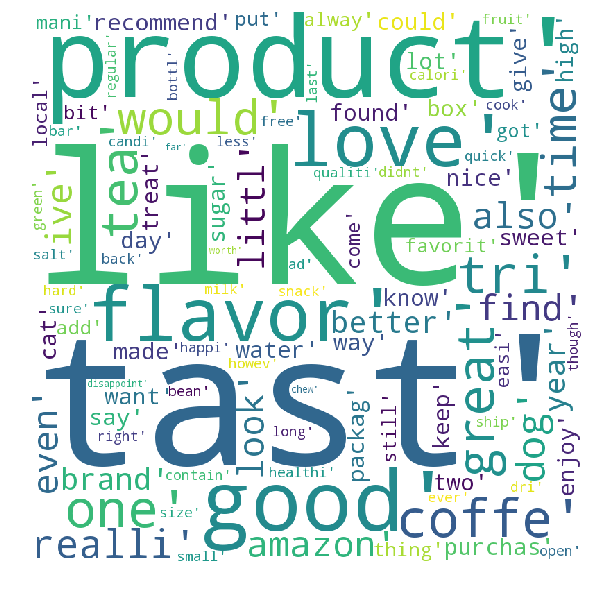


 Cluster 1:


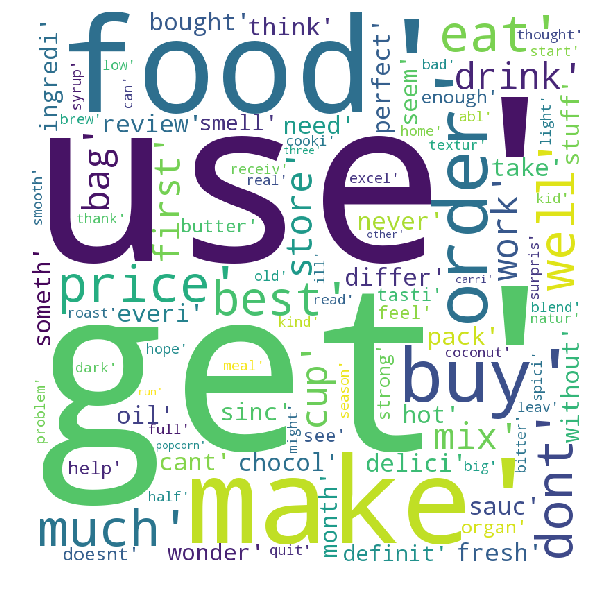

In [0]:
for i in clusters_data_tfidf:
  print("\n Cluster %d:" % i)
  clusterList_tfidf=[]
  words = clusters_data_tfidf.get(i)
  #putting the word into there respective cluster
  for index in words[0:100]:
    clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

## 7.1 AgglomerativeClustering with n_clusters=5

In [0]:
AC = AgglomerativeClustering(n_clusters=5)
AC.fit(x_av1)
labels = AC.labels_
feature_names=w2v_model.wv.index2word

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_tfidf = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_tfidf:
    clusters_data_tfidf[label] = []
  clusters_data_tfidf[label].append(document_id)


 Cluster 0:


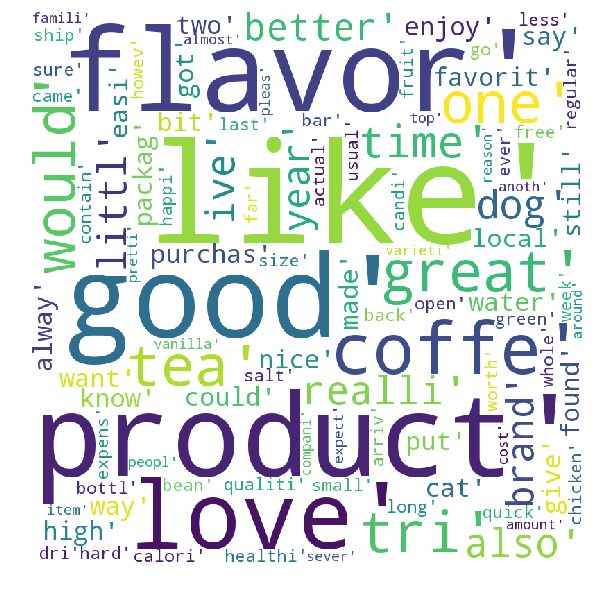


 Cluster 2:


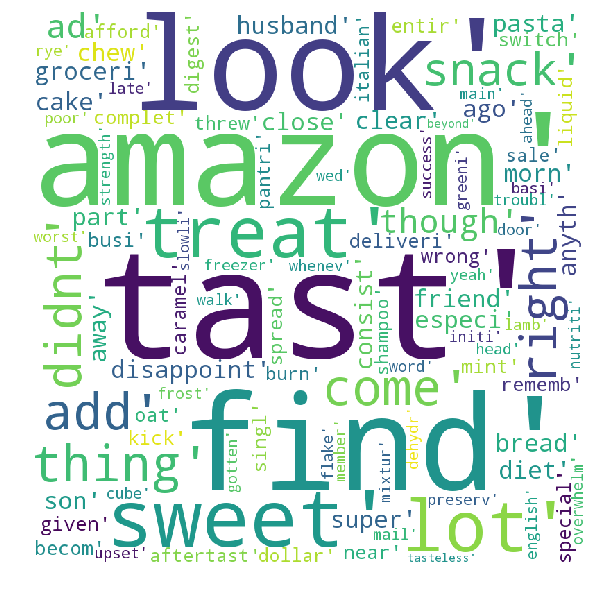


 Cluster 1:


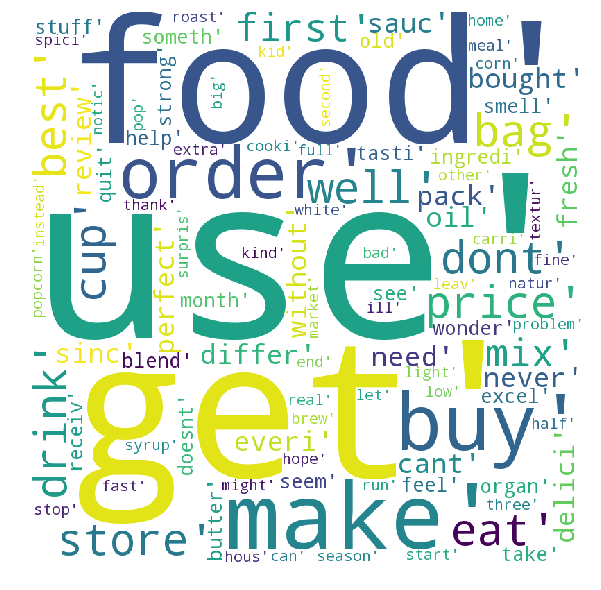


 Cluster 3:


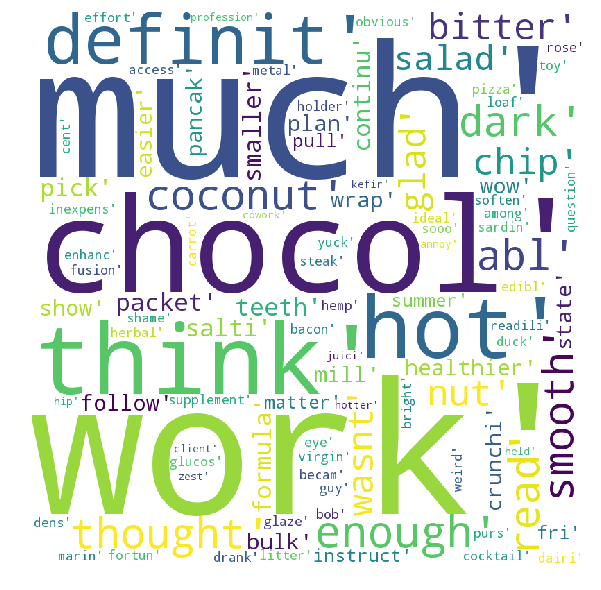


 Cluster 4:


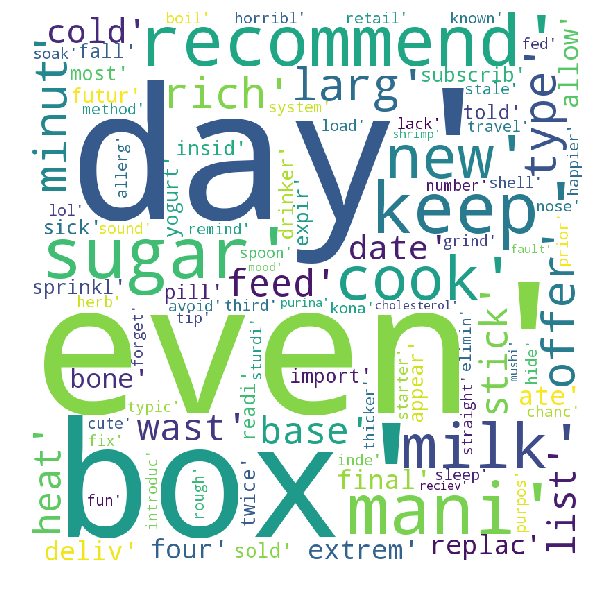

In [0]:
for i in clusters_data_tfidf:
  print("\n Cluster %d:" % i)
  clusterList_tfidf=[]
  words = clusters_data_tfidf.get(i)
  #putting the word into there respective cluster
  for index in words[0:100]:
    clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

# 8. TFIDF-W2V

In [0]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(x)
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

In [0]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 5000/5000 [00:04<00:00, 1162.22it/s]


In [0]:
x_tdfw2v=tfidf_sent_vectors

## 8.1 AgglomerativeClustering with n_clusters=2

In [0]:
AC = AgglomerativeClustering(n_clusters=2)
AC.fit(x_tdfw2v)
labels = AC.labels_
feature_names=w2v_model.wv.index2word

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_tfidf = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_tfidf:
    clusters_data_tfidf[label] = []
  clusters_data_tfidf[label].append(document_id)


 Cluster 0:


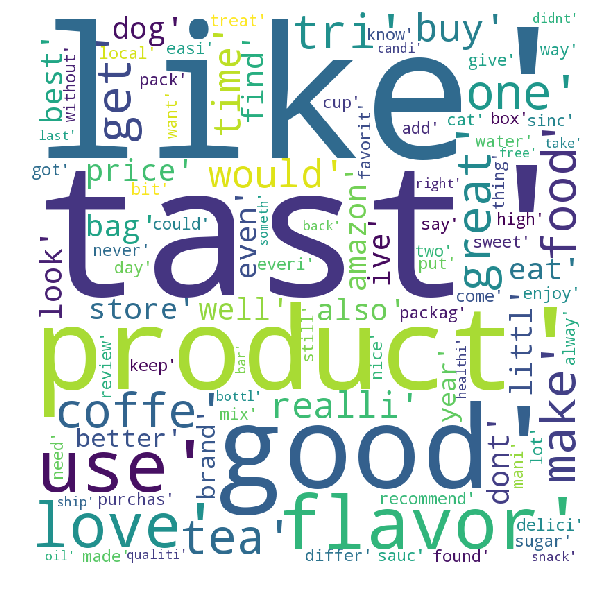


 Cluster 1:


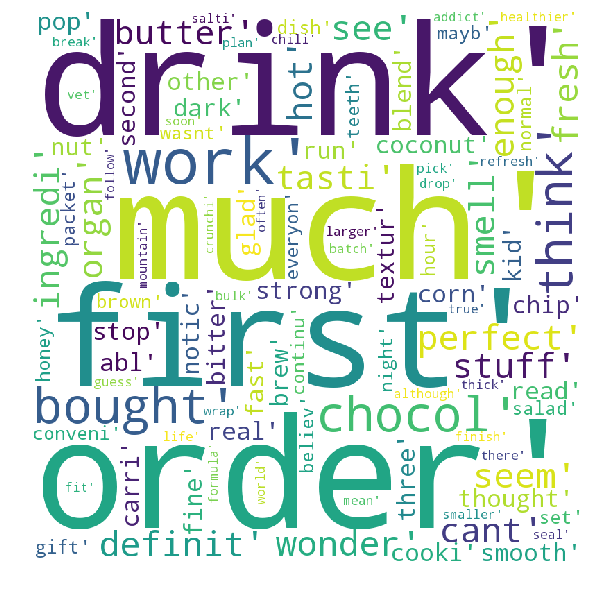

In [0]:
for i in clusters_data_tfidf:
  print("\n Cluster %d:" % i)
  clusterList_tfidf=[]
  words = clusters_data_tfidf.get(i)
   #putting the word into there respective cluster
  for index in words[0:100]:
    clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

## 8.1 AgglomerativeClustering with n_clusters=5

In [0]:
AC = AgglomerativeClustering(n_clusters=5)
AC.fit(x_tdfw2v)
labels = AC.labels_
feature_names=w2v_model.wv.index2word

## WordClouds

In [0]:
#index of each bi_uni clusters_data with there respective Labels
clusters_data_tfidf = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data_tfidf:
    clusters_data_tfidf[label] = []
  clusters_data_tfidf[label].append(document_id)


 Cluster 2:


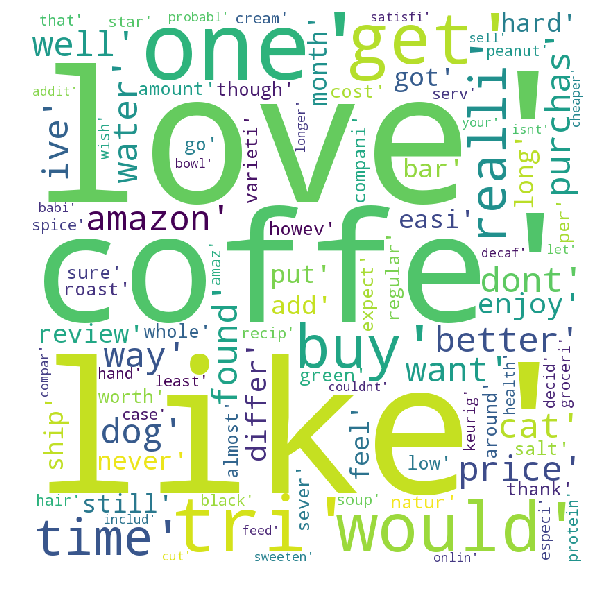


 Cluster 4:


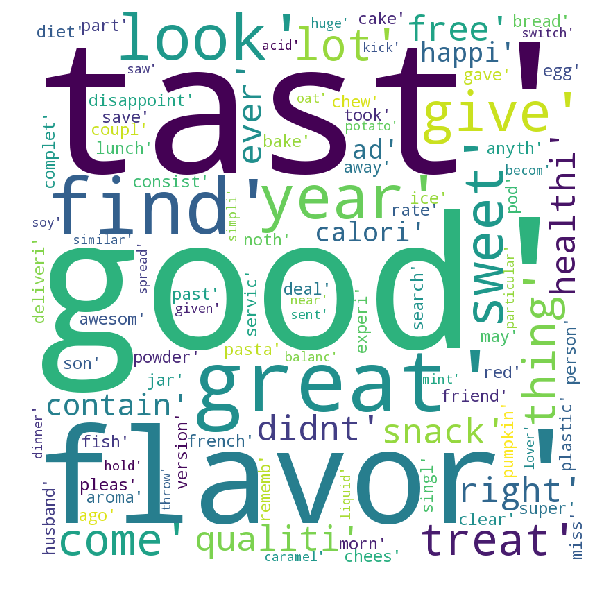


 Cluster 3:


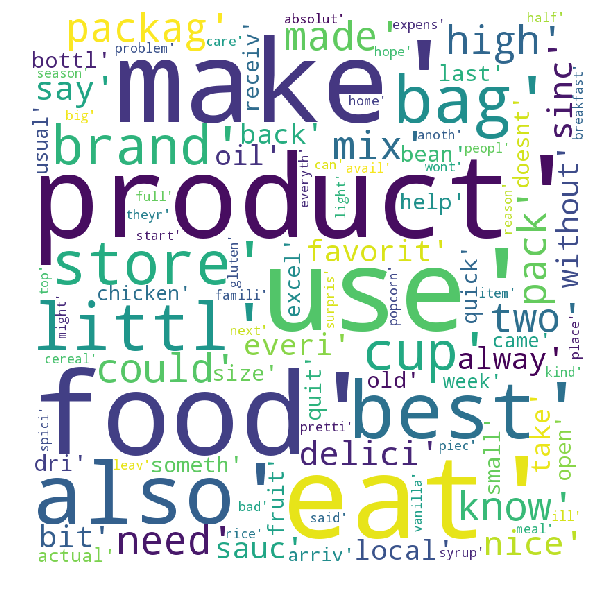


 Cluster 1:


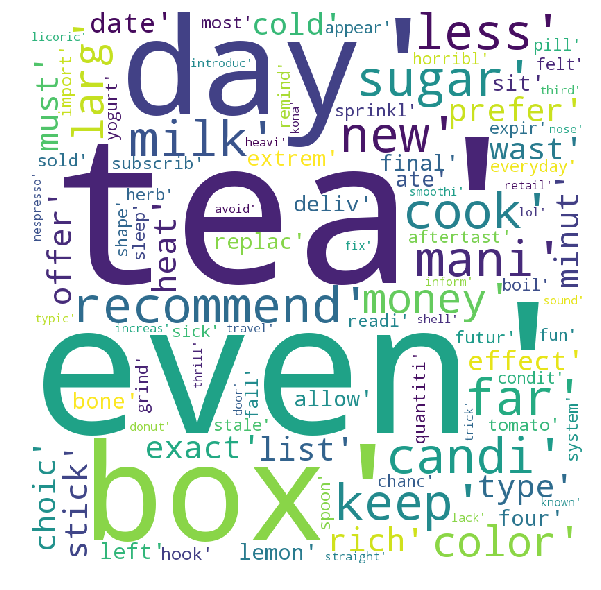


 Cluster 0:


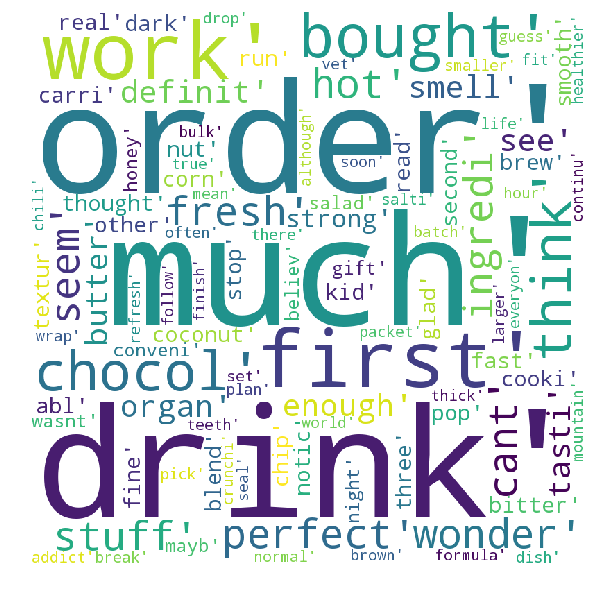

In [0]:
for i in clusters_data_tfidf:
  print("\n Cluster %d:" % i)
  clusterList_tfidf=[]
  words = clusters_data_tfidf.get(i)
  #putting the word into there respective cluster
  for index in words[0:100]:
    clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
  

# DBSCAN

## 1 Word2Vec

In [0]:
i=0
list_of_sent=[]
for sent in x:
    list_of_sent.append(sent.split())

In [0]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [0]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  5976
sample words  ['big', 'lover', 'fig', 'jam', 'uniqu', 'flavor', 'kind', 'mix', 'light', 'dark', 'mission', 'must', 'tri', 'tasti', 'fresh', 'one', 'bought', 'old', 'tast', 'moldi', 'good', 'like', 'blend', 'use', 'nice', 'tea', 'almond', 'milk', 'honey', 'notic', 'peopl', 'loss', 'want', 'let', 'know', 'return', 'new', 'compani', 'got', 'trademark', 'say', 'read', 'dot', 'com', 'order', 'expect', 'box', 'full', 'fortun', 'cooki']


# 2.Avg W2V

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

20000
50


In [0]:
x_av1=sent_vectors

## Finding the optimal eps

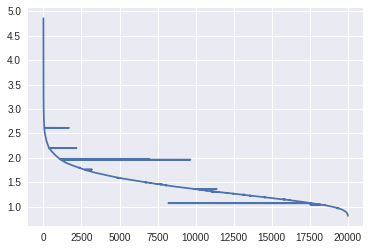

In [0]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=100).fit(x_av1)
distances, indices = nbrs.kneighbors(x_av1)
distanceDec = sorted(distances[:,100-1], reverse=True)
plt.plot(indices[:,0],distanceDec,)

## training dbscan on optimal eps

In [0]:
dbscan= DBSCAN(eps=2)
dbscan = dbscan.fit(x_av1)
labels = dbscan.labels_
feature_names =  w2v_model.wv.index2word

## Word Cloud

In [0]:
clusters_data = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data:
    clusters_data[label] = []
  clusters_data[label].append(document_id)

cluster 1


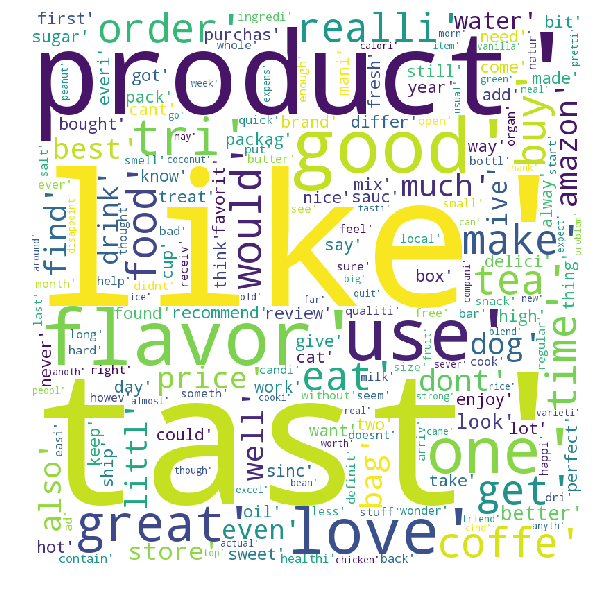

cluster -1


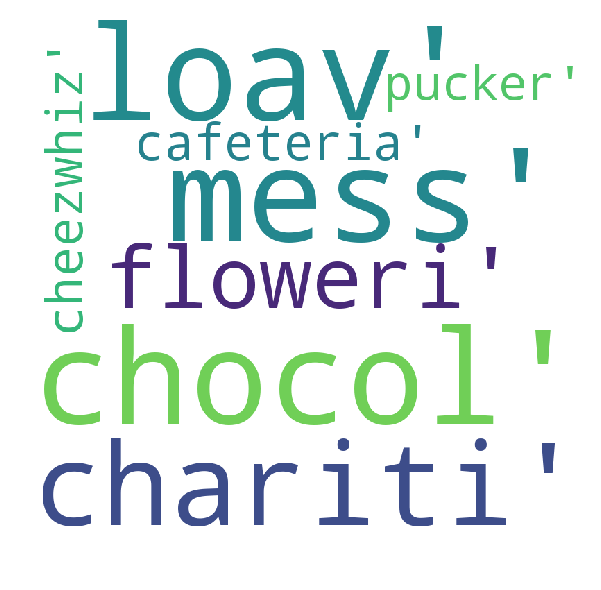

In [0]:
for i in clusters_data:
  print("\n Cluster %d:" % i),
  print("===================")
  clusterList_tfidf =[]
  words = clusters_data.get(i)
  for index in words[0:100]:
      clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

# 3. TFIDF-W2V

In [0]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(x)
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

In [0]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 20000/20000 [00:24<00:00, 827.65it/s]


In [0]:
x_tdfw2v=tfidf_sent_vectors

## Finding the optimal eps

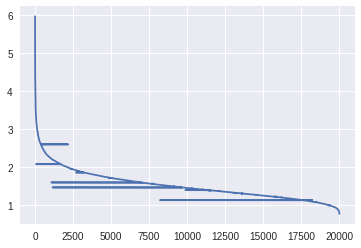

In [0]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=100).fit(x_tdfw2v)
distances, indices = nbrs.kneighbors(x_tdfw2v)
distanceDec = sorted(distances[:,100-1], reverse=True)
plt.plot(indices[:,0],distanceDec,)

## Training on optimal eps

In [0]:
dbscan= DBSCAN(eps=2)
dbscan = dbscan.fit(x_tdfw2v)
labels = dbscan.labels_

In [0]:
feature_names =  w2v_model.wv.index2word

In [0]:
clusters_data = {}
for document_id,label in enumerate(labels):
  if label not in clusters_data:
    clusters_data[label] = []
  clusters_data[label].append(document_id)

## Wordcloud

Cluster 0


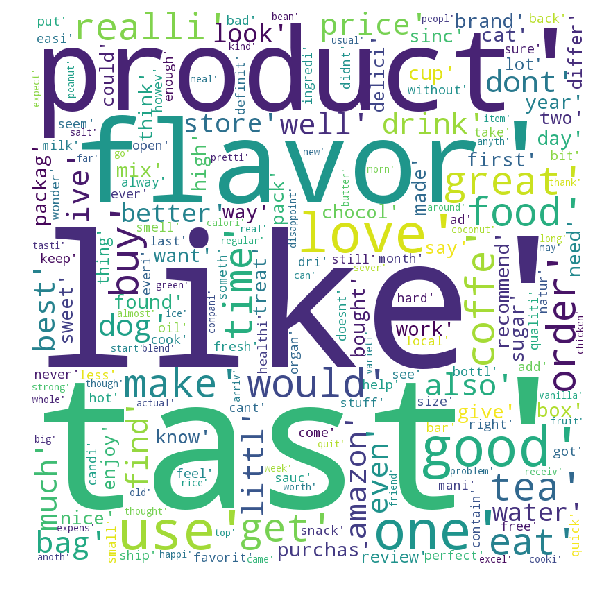

Cluster -1


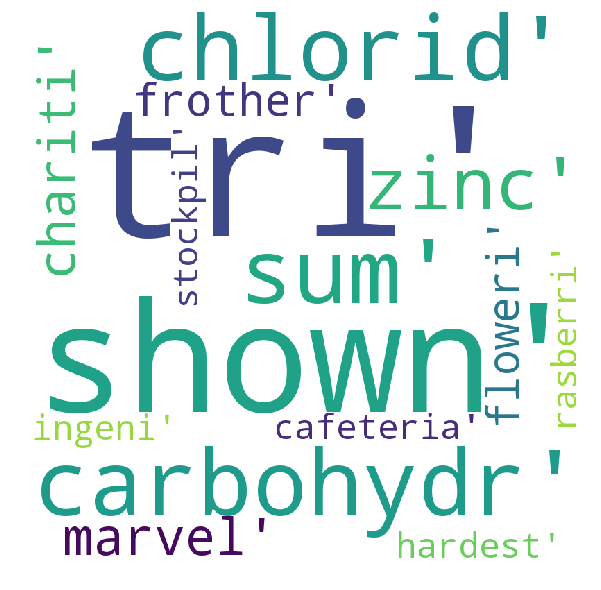

In [0]:
for i in clusters_data:
  print("\n Cluster %d:" % i),
  print("===================")
  clusterList_tfidf =[]
  words = clusters_data.get(i)
  for index in words[0:100]:
      clusterList_tfidf.append(feature_names[index])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(str(clusterList_tfidf))
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

## Conclusion

### Agglomerative

1.As per assignment guidelines i perform AgglomerativeClustering for n_cluster=2 and n_cluster=5<br>
2.Finding out label for each cluster using AG.label_<br>
3.map each data point index and cluster with there respective feature map<br>
4.Plot wordCloud for each clusters<br>

### DBSCAN

1.Findout the optimal eps using NearestNeighbors<br>
2.find the 100 data point distance<br>
3.sorting the distance in ascending order
4.Ploting graph between indes and distance
5.finding the optimal value where there is high increase in distance 